In [2]:
import numpy as np
import pandas as pd
from binance.um_futures import UMFutures
from binance.websocket.um_futures.websocket_client import UMFuturesWebsocketClient
from itertools import product
from datetime import datetime
import random

# my own library
from backTester.BackTester import BackTester
from backTester.BackDataLoader import BackDataLoader
from conditionGenerator.ConditionGenerator import ConditionGenerator

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# backdata loading.
monthPair = [[1, 2], [2, 3], [3, 4], [4, 5], [7, 8], [8, 9], [9, 10]]
backdatas = dict()
for i, (m1, m2) in enumerate(monthPair):
    backdatas[i] = pd.read_pickle(f"BackDataList\\backdata1m_period_{m1}_1_to_{m2}_1.pkl")

In [4]:
backdata0 = backdatas[0].copy()

In [5]:
window_MA = 30
window_ER = 30
backdata0['MA'] = backdata0['Close'].rolling(window_MA).mean()
backdata0['std'] = backdata0['Close'].rolling(window_MA).std()
backdata0['UB'] = backdata0['MA'] + 2 * backdata0['std']
backdata0['LB'] = backdata0['MA'] - 2 * backdata0['std']
backdata0['U75'] = backdata0['MA'] + backdata0['std']
backdata0['L25'] = backdata0['MA'] - backdata0['std']
backdata0['ER'] = backdata0['Close'].diff(window_ER).abs()/backdata0['Close'].diff().abs().rolling(window_ER).sum()

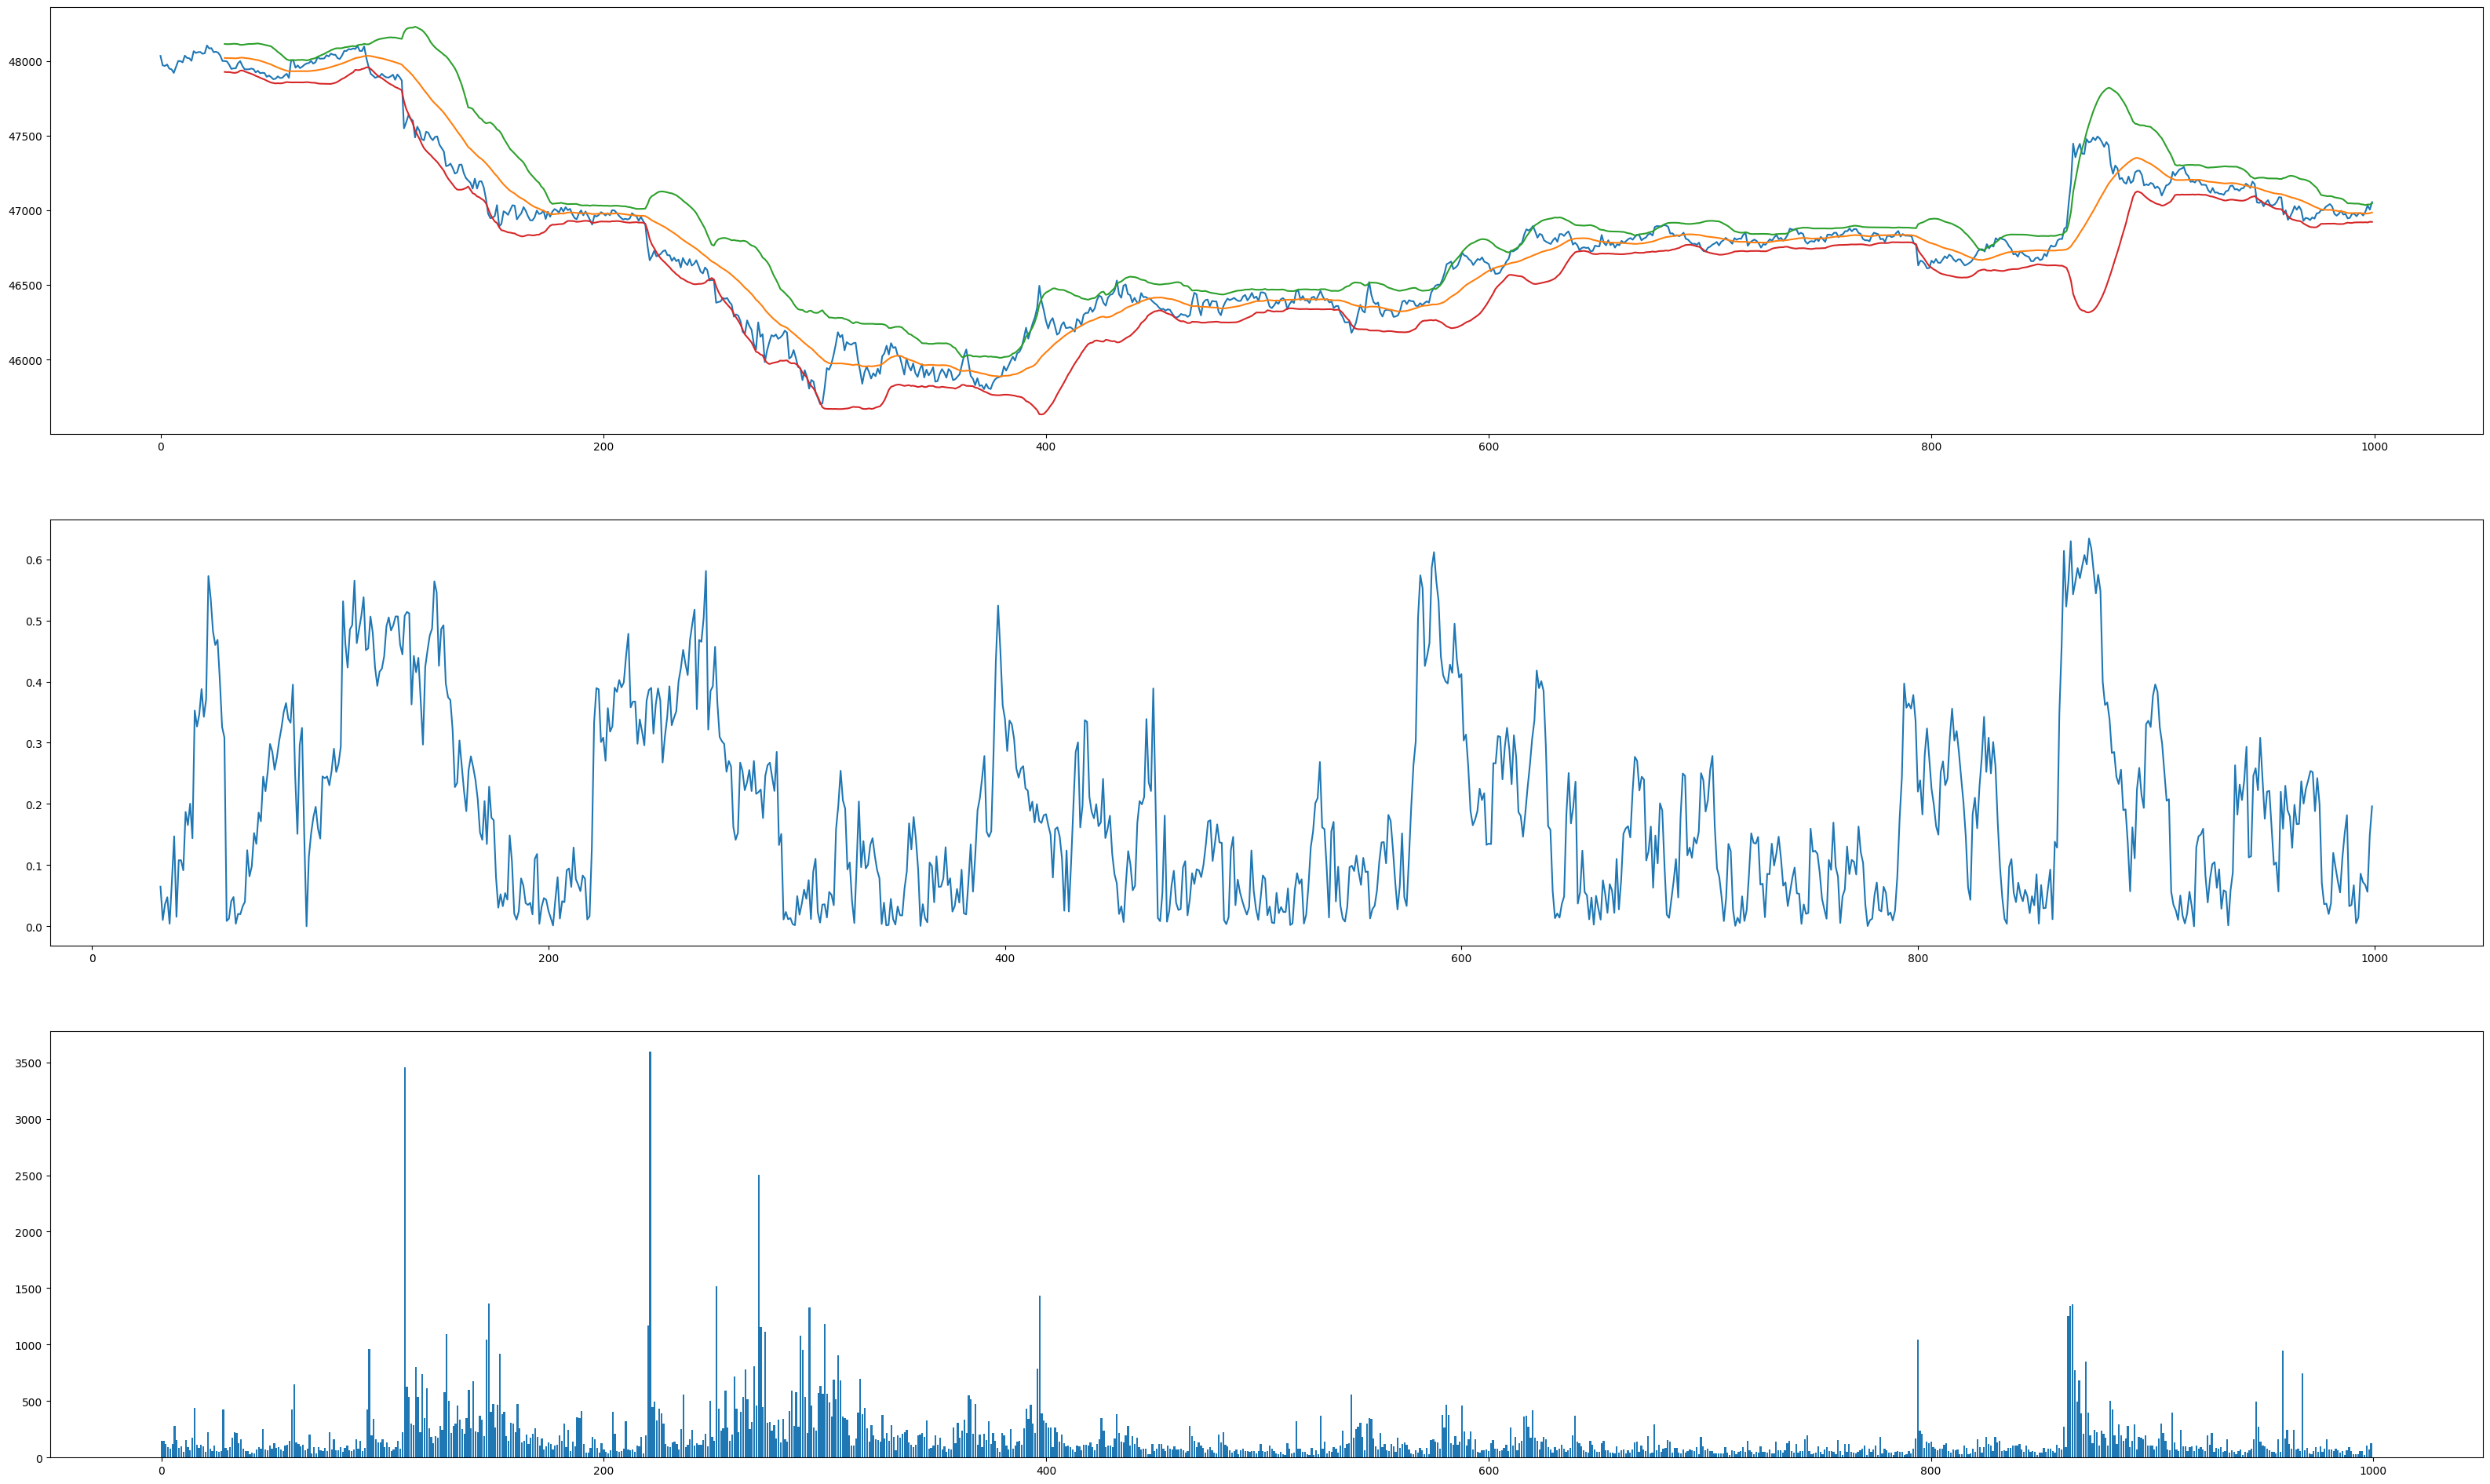

In [11]:
df = backdata0[:1000]
fig = plt.figure(figsize=(40, 24))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df[['Close', 'MA', 'UB', 'LB']])
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df['ER'])
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(range(df.shape[0]), df['Volume'])
plt.show()

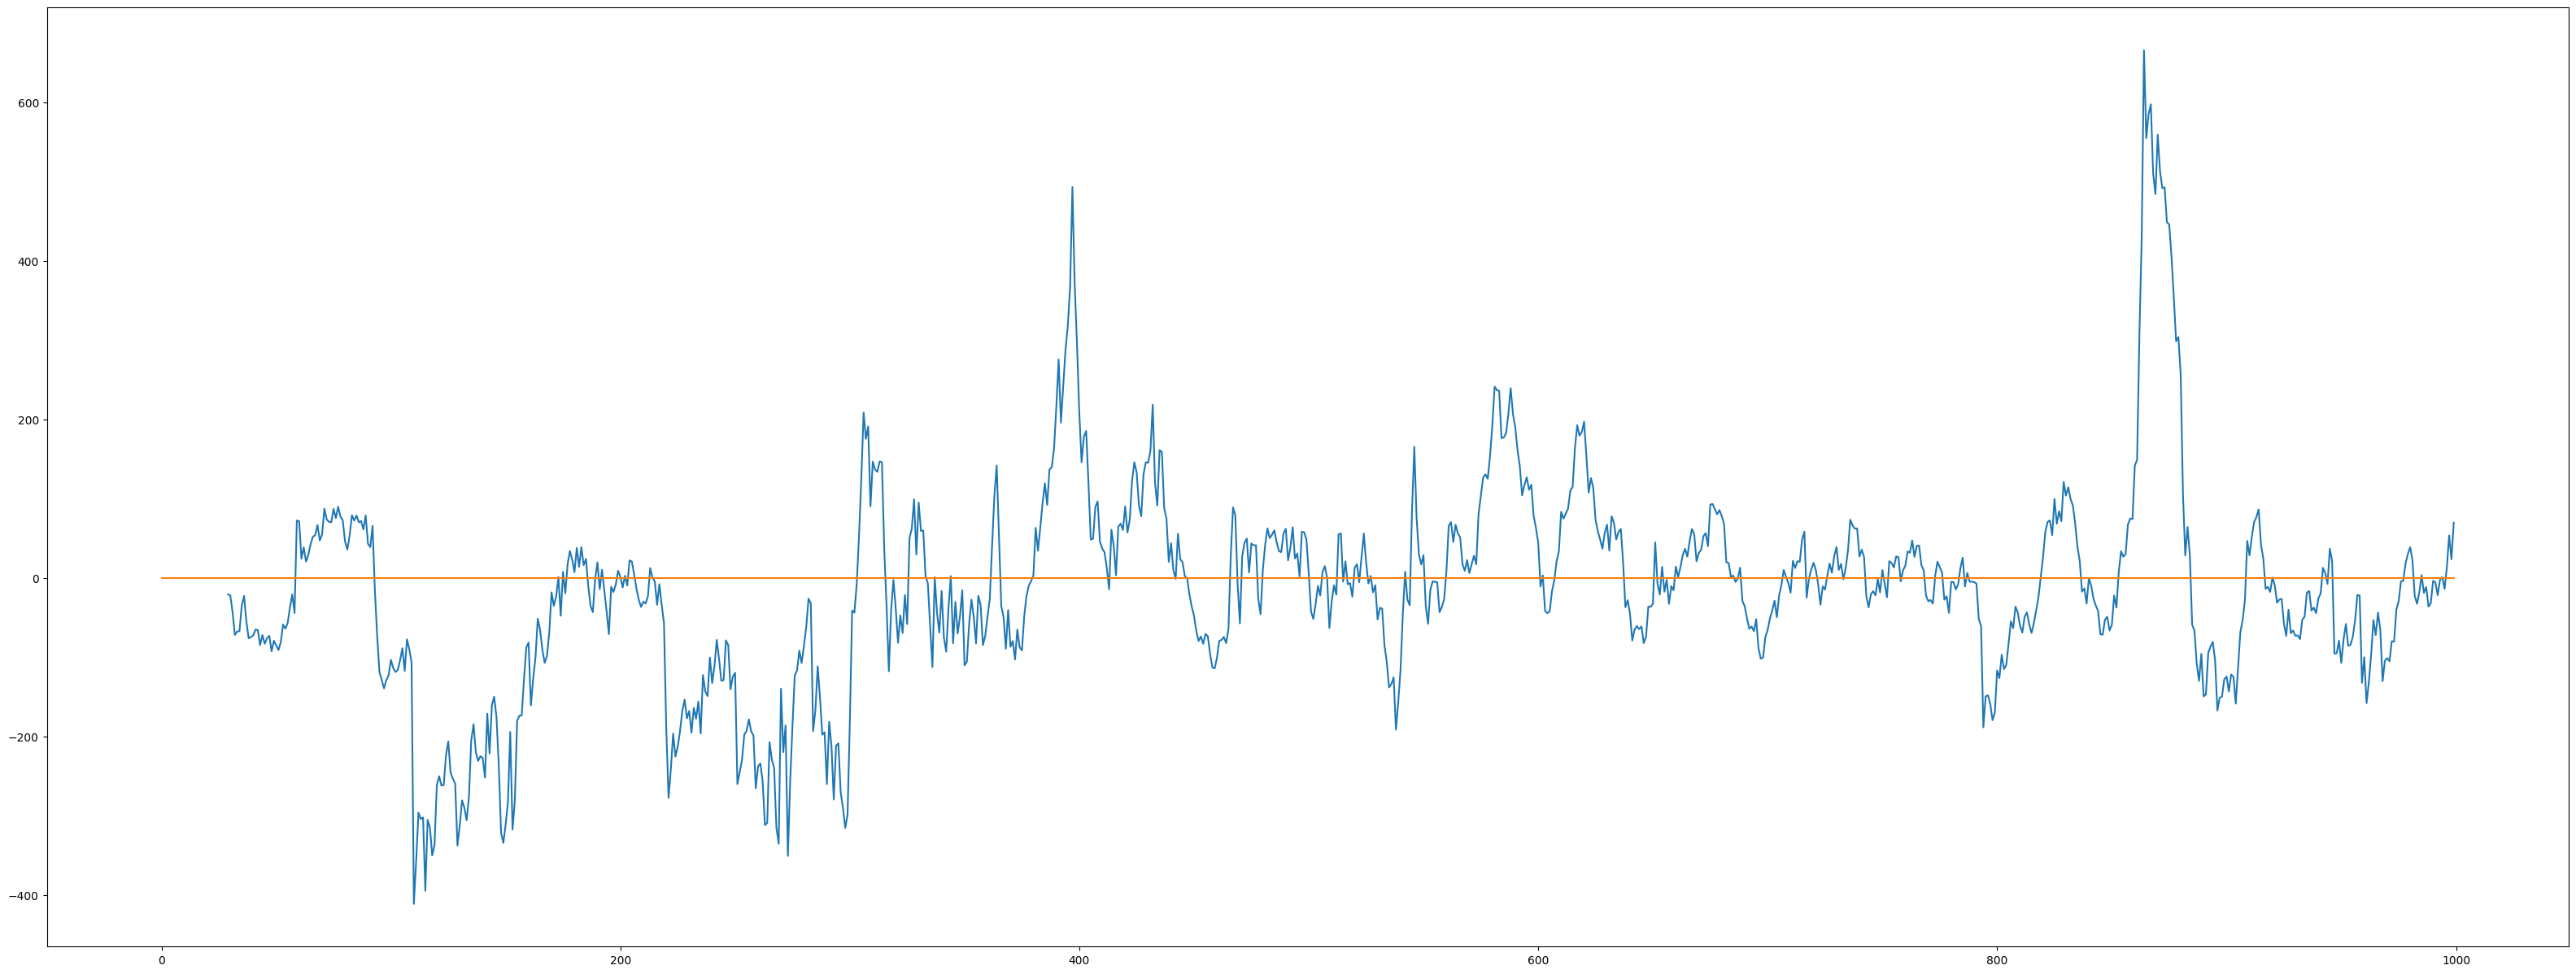

In [10]:
df = backdata0[:1000]
plt.figure(figsize=(40, 15))
plt.plot(df['Close']-df['MA'])
plt.plot([0]*1000)
plt.show()

MA와 Close를 뺀 절댓값이 80이상 차이가 난다 ? 그러면 그 전의 데이터를 보자고. 어떤 일이 발생하고 있는지
80이상 차이가 나면서, Close가 일반적으로 내려가는 추세다~ 라고 하면.
dfMA 5 정도도 한번 만들어 볼까. MA5가 계속 내려가는 / 올라가는 추세이며, MA30과 Close의 차이가 80이상 난다그러면. 분명히 업/다운의 추세를 보이고 있다고 볼 수 있지 않나.

In [15]:
dfabs80Idx = df[(df['Close']-df['MA']).abs()>80].index

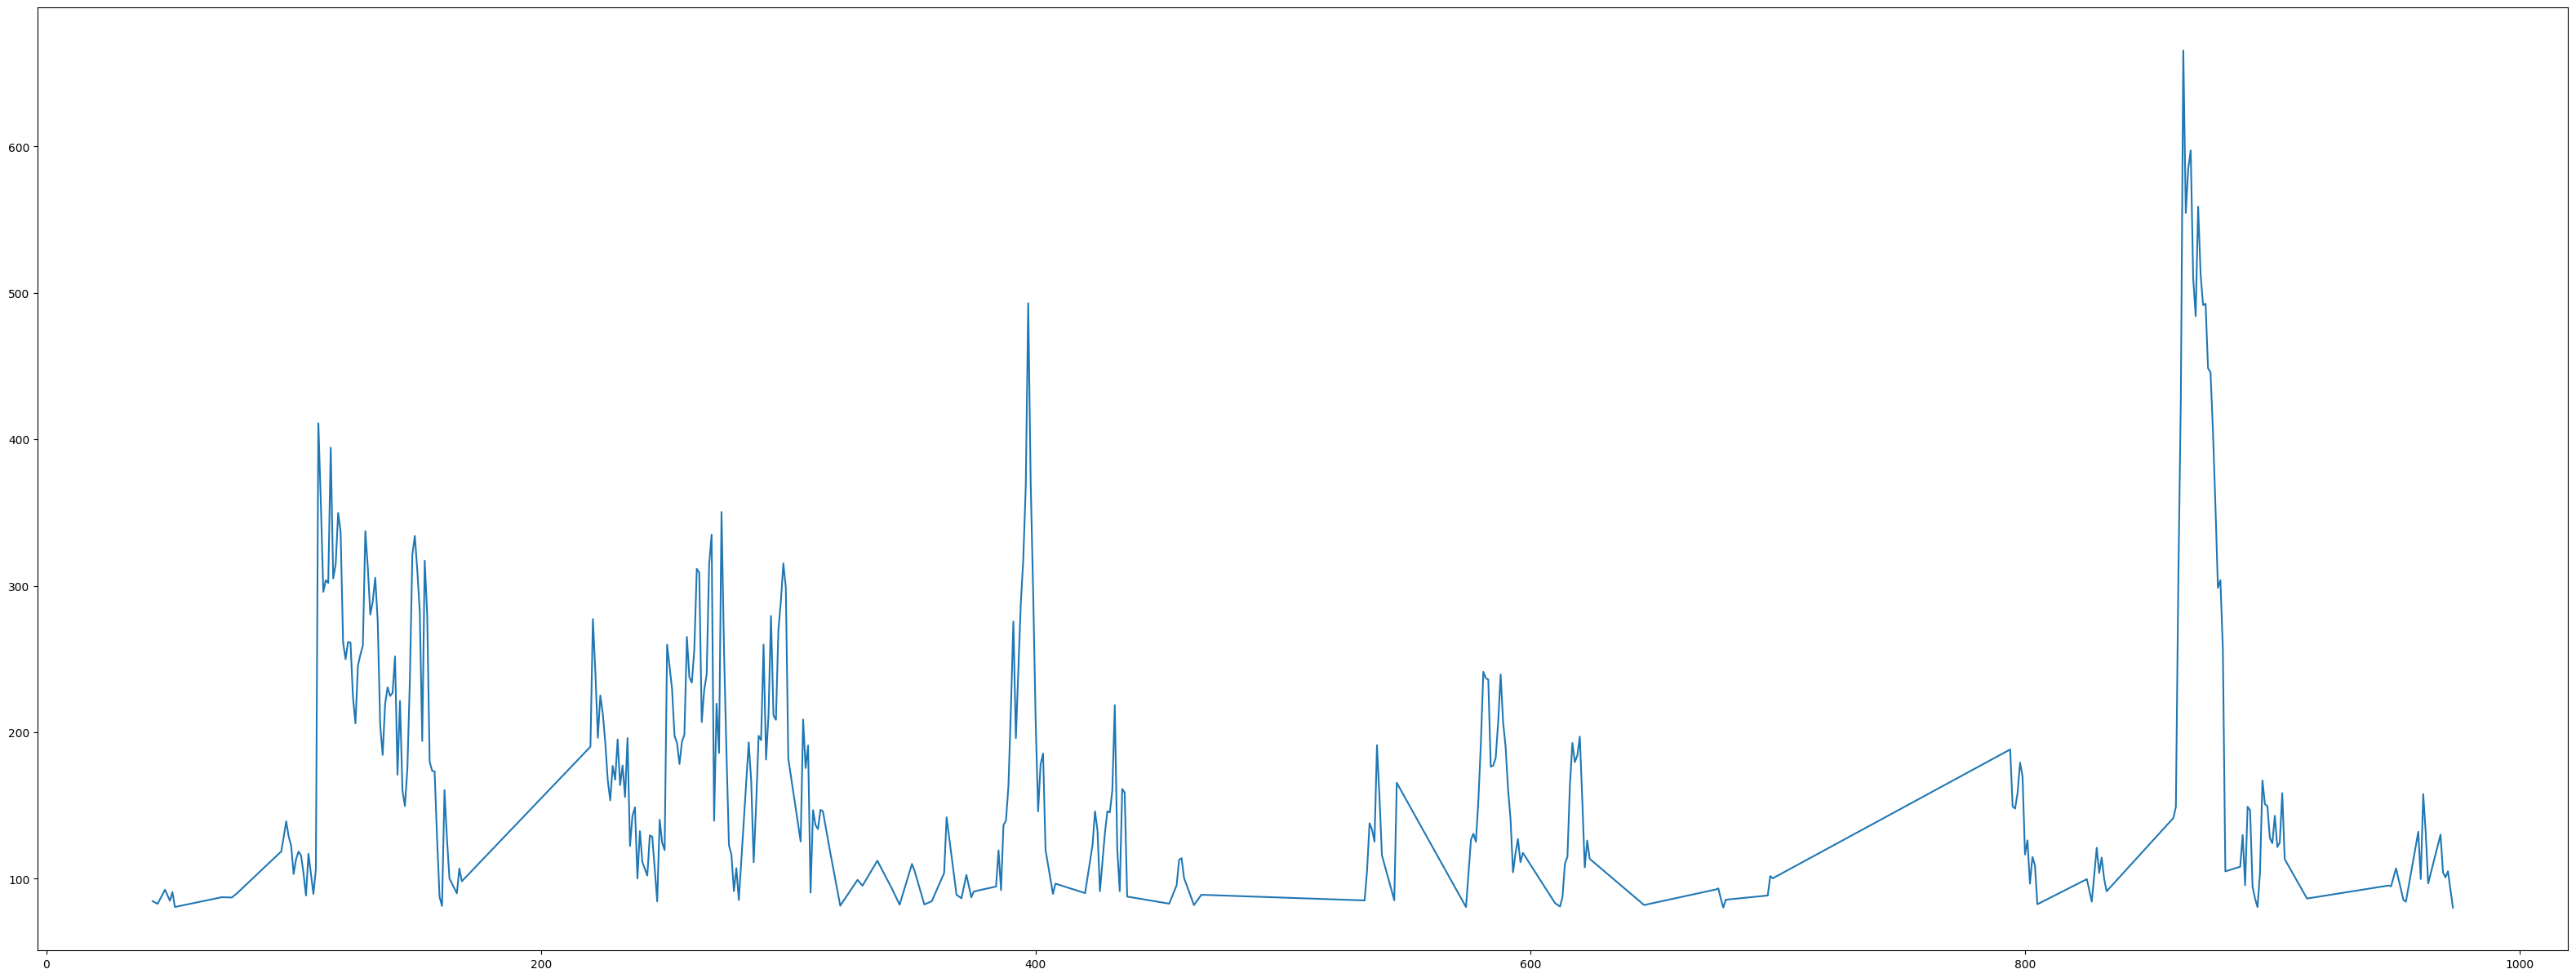

In [23]:
dfabs80 = df.iloc[dfabs80Idx]
plt.figure(figsize=(40, 15))
plt.plot((dfabs80['Close']-dfabs80['MA']).abs())
plt.show()

In [20]:
df.iloc

KeyError: "None of [Int64Index([1, 2], dtype='int64')] are in the [columns]"